## LSTM (Long Short Term Memory)

In [1]:
import numpy as np
import pandas as pd

In [2]:
np.__version__

'1.23.5'

### LSTM 處理 IMDB 分類問題

In [3]:
from keras.datasets import imdb
from keras_preprocessing import sequence

max_features = 10000  # 要考慮作為特徵的語詞數量
maxlen = 500  # 當句子的長度超過500個語詞的部份,就把它刪除掉

# 載入IMDB的資料
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

# 如果長度不夠的話就補空的
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [5]:
import keras
from keras.models import Sequential
from keras.layers import Embedding, Dense, LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
157/157 [==============================] - 65s 393ms/step - loss: 0.5472 - acc: 0.7398 - val_loss: 0.3695 - val_acc: 0.8458
Epoch 2/10
157/157 [==============================] - 67s 428ms/step - loss: 0.3066 - acc: 0.8798 - val_loss: 0.5528 - val_acc: 0.7962
Epoch 3/10
157/157 [========================

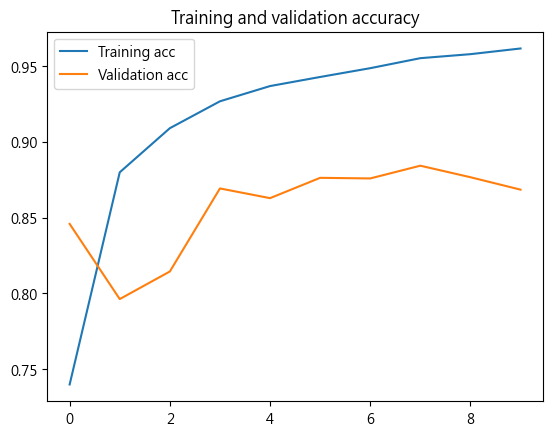

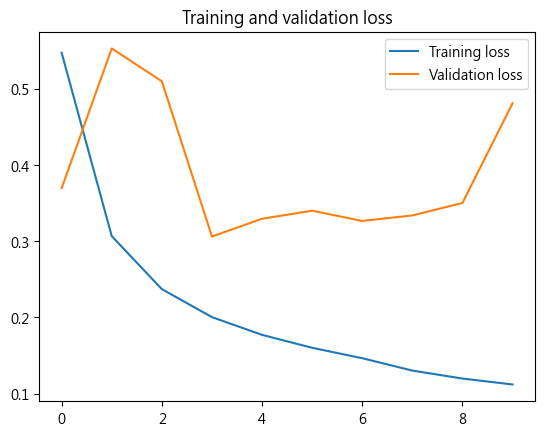

In [6]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [7]:
# Evaluate the model on the test data
score, acc = model.evaluate(input_test, y_test, verbose=0)
print("Test accuracy:", acc)

# Make predictions on the test data
predictions = model.predict(input_test)

# Since model's output is a probability, you can round the values to get binary predictions (0 or 1)
binary_predictions = [1 if p > 0.5 else 0 for p in predictions]

# Print some sample predictions
print("Sample Predictions:")

# Check top 10 data
for i in range(10):
    print("Actual:", y_test[i], "Predicted:", binary_predictions[i])

Test accuracy: 0.8533599972724915
782/782 [==============================] - 43s 54ms/step
Sample Predictions:
Actual: 0 Predicted: 0
Actual: 1 Predicted: 1
Actual: 1 Predicted: 1
Actual: 0 Predicted: 1
Actual: 1 Predicted: 1
Actual: 1 Predicted: 1
Actual: 1 Predicted: 1
Actual: 0 Predicted: 0
Actual: 0 Predicted: 1
Actual: 1 Predicted: 1
